# Test chi-cuadrado para selección de variables categóricas



Las características de un modelo de ML son las columnas que describen las características de los objetivos que se van a medir. Por ejemplo, para una persona: edad, sexo, peso, nivel de educación, años de experiencia laboral, dirección particular, etc.

La selección de características es un proceso que implica reducir las variables de entrada necesarias en un modelo utilizando solo datos relevantes y eliminando aquellas variables que agregan poca o ninguna información. Según el ejemplo anterior, el peso y la dirección probablemente no deberían usarse en un modelo que intenta determinar el salario de un individuo.

Este proceso simplifica el modelo, reduce el tiempo de entrenamiento, evita el sobreajuste y también ayuda a los científicos de datos a evitar la maldición de la dimensionalidad.

Generalmente existen dos tipos de features en un modelo de aprendizaje automático:

1.- **Características numéricas:** variables cuantitativas que conllevan un sentido de magnitud relacionado con el contexto de la variable y que se pueden medir en números, por ejemplo, edad, altura, salario.

2.- **Características categóricas:** variables cualitativas que pueden asignarse en función de cualidades particulares, por ejemplo, sexo, ubicación, departamento, estado civil.

Estos diferentes tipos de características tienen diferentes técnicas de selección. Se suele usar el rango de correlación de Pearson y prueba de chi-cuadrado para las características categóricas.

Nos dedicaremos a aplicar la técnica de selección de características usando el test Chi-cuadrado en variables categóricas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [ ]:
HR_data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Partiremos el dataset en sus variables numéricas y categóricas

In [ ]:
num_data = HR_data.select_dtypes(include=[np.number])
num_data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
cat_data = HR_data.select_dtypes(exclude=[np.number])
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


Revisemos el número de valores únicos en cada variable categórica

In [ ]:
cat_data.nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

Tiremos variables con poca información (i.e., aquellas con un solo valor único)

In [ ]:
cat_data = cat_data.drop('Over18',axis=1)
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


Ahora, codifiquemos las variables categóricas

In [ ]:
# Para variables con 2 valores únicos, utilicemos una codificación binaria
cat_data['Attrition'] = cat_data['Attrition'].replace({'Yes':1, 'No':0})
cat_data['Gender'] = cat_data['Gender'].replace({'Male':1, 'Female':0})
cat_data['OverTime'] = cat_data['OverTime'].replace({'Yes':1, 'No':0})

In [ ]:
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,0,Sales Executive,Single,1
1,0,Travel_Frequently,Research & Development,Life Sciences,1,Research Scientist,Married,0
2,1,Travel_Rarely,Research & Development,Other,1,Laboratory Technician,Single,1
3,0,Travel_Frequently,Research & Development,Life Sciences,0,Research Scientist,Married,1
4,0,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,Married,0


In [ ]:
# Para las demás, utilicemos one-hot encoding utilizando el método get_dummies
cat_data_encoded = pd.get_dummies(cat_data)
cat_data_encoded.head()

,Attrition,Gender,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0,1,0,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,1,1,1,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0,0,1,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0,1,0,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False


Particionemos el dataset en features y target

In [ ]:
X = cat_data_encoded.drop(columns = 'Attrition', axis = 1)
y = cat_data_encoded[['Attrition']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1470, 26) (1176, 26) (294, 26)


## Test Chi-cuadrado

La prueba Chi-cuadrado devuelve 2 valores: la puntuación F y el valor p. El valor p se utiliza generalmente para determinar la importancia de las características de las variables categóricas (especialmente las nominales).

Si el valor p obtenido es < 0,05 se rechaza la H₀ (hipótesis nula) y se acepta la H₁ (hipótesis alternativa). Esto significa que las dos variables categóricas son dependientes. Mientras que si el valor p obtenido es > 0,05 se acepta la H₀ (hipótesis nula) y se rechaza la H₁ (hipótesis alternativa). Esto significa que las dos variables categóricas son independientes.

En el caso de la selección de features, es recomendable que la feature que se compara con el objetivo tenga un valor p bajo (menos de 0,05), ya que esto significa que la feature depende (se correlaciona) del objetivo.

In [ ]:
#El primer arreglo son los f-scores, el segundo, los p-values
f_p_values = chi2(X_train, y_train)
f_p_values

(array([6.40744443e-01, 6.58869059e+01, 6.35250655e+00, 1.20484274e+01,
        7.86077816e-01, 3.57315486e-01, 3.29998530e+00, 5.86595610e+00,
        1.71120012e+00, 8.55332403e-01, 2.15893349e+00, 1.27850856e+00,
        3.94475564e-02, 4.51975688e+00, 1.09335688e+01, 1.45838756e+00,
        9.70886782e+00, 7.82068334e+00, 8.09878673e+00, 9.37716392e+00,
        1.50081661e-01, 1.40414824e-01, 3.21427799e+01, 9.60958938e+00,
        6.63350741e+00, 3.43547019e+01]),
 array([4.23441352e-01, 4.77553834e-16, 1.17215568e-02, 5.18360898e-04,
        3.75288749e-01, 5.50000939e-01, 6.92805033e-02, 1.54364721e-02,
        1.90829735e-01, 3.55048191e-01, 1.41743042e-01, 2.58176527e-01,
        8.42564632e-01, 3.35055922e-02, 9.44374074e-04, 2.27186852e-01,
        1.83380955e-03, 5.16516628e-03, 4.42948987e-03, 2.19705199e-03,
        6.98457332e-01, 7.07868969e-01, 1.43248048e-08, 1.93563919e-03,
        1.00078015e-02, 4.59289435e-09]))

In [ ]:
# Convertimos de arreglos a series ...
F_score = pd.Series(f_p_values[0])
F_score.index = X_train.columns
F_score

p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

Gender                               4.234414e-01
OverTime                             4.775538e-16
BusinessTravel_Non-Travel            1.172156e-02
BusinessTravel_Travel_Frequently     5.183609e-04
BusinessTravel_Travel_Rarely         3.752887e-01
Department_Human Resources           5.500009e-01
Department_Research & Development    6.928050e-02
Department_Sales                     1.543647e-02
EducationField_Human Resources       1.908297e-01
EducationField_Life Sciences         3.550482e-01
EducationField_Marketing             1.417430e-01
EducationField_Medical               2.581765e-01
EducationField_Other                 8.425646e-01
EducationField_Technical Degree      3.350559e-02
JobRole_Healthcare Representative    9.443741e-04
JobRole_Human Resources              2.271869e-01
JobRole_Laboratory Technician        1.833810e-03
JobRole_Manager                      5.165166e-03
JobRole_Manufacturing Director       4.429490e-03
JobRole_Research Director            2.197052e-03


In [ ]:
# ... para después convertir a dataframes y unirlos
df1 = pd.DataFrame(F_score)
df1 = df1.rename(columns = {0:'F_score'})

df2 = pd.DataFrame(p_values)
df2 = df2.rename(columns = {0:'p_values'})

chi_test_score = pd.concat([df1, df2 ], axis=1)
chi_test_score.head()

,F_score,p_values
Gender,0.640744,4.234414e-01
OverTime,65.886906,4.775538e-16
BusinessTravel_Non-Travel,6.352507,1.172156e-02
BusinessTravel_Travel_Frequently,12.048427,5.183609e-04
BusinessTravel_Travel_Rarely,0.786078,3.752887e-01


Podemos visualizar los p-values junto con el treshold de aceptación

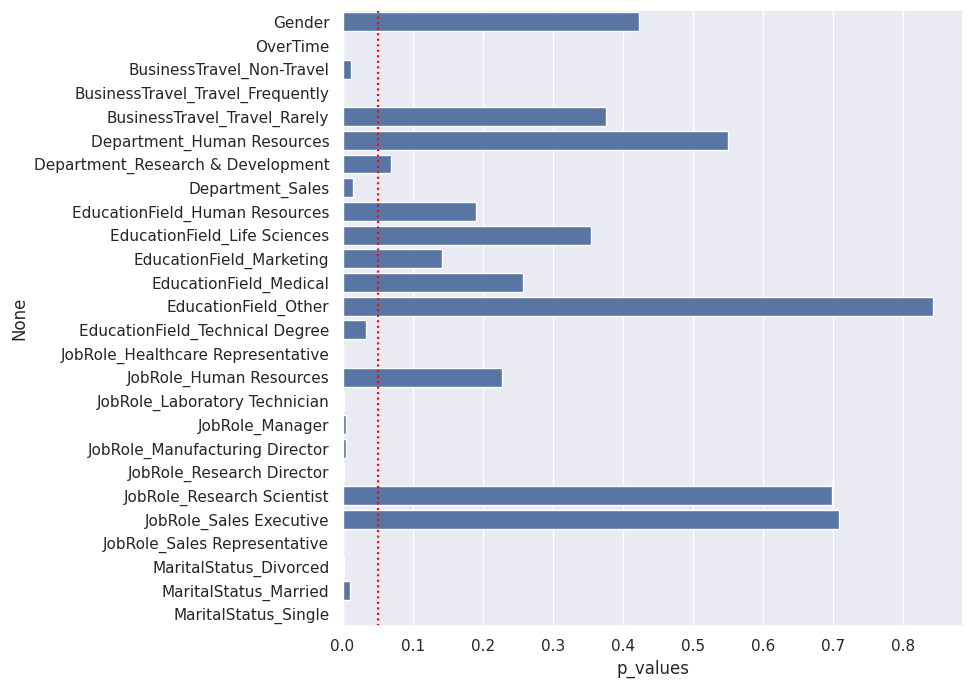

In [ ]:
sns.set(rc={"figure.figsize":(8, 8)})

graph = sns.barplot(x = "p_values", y= X_train.columns, data = chi_test_score)

# El treshod para los p-values será 0.05
graph.axvline(0.05, color = 'red', ls = 'dotted')

In [ ]:
# Eliminaremos variables con un valor p > 0.05 de nuestro dataframe categórico ...
cat_data2 = cat_data_encoded.drop(columns = ['Gender', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources','EducationField_Human Resources',\
                                     'EducationField_Life Sciences','EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other',\
                                    'JobRole_Human Resources', 'JobRole_Research Scientist', 'JobRole_Sales Executive'],axis = 1)
cat_data2.head()

,Attrition,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,1,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,0,0,False,True,True,False,False,False,False,False,False,False,False,False,True,False
2,1,1,False,False,True,False,False,False,True,False,False,False,False,False,False,True
3,0,1,False,True,True,False,False,False,False,False,False,False,False,False,True,False
4,0,0,False,False,True,False,False,False,True,False,False,False,False,False,True,False


In [ ]:
# ... y volvemos a unir nuestros dataframes categóricos y numéricos
HR_data2 = pd.concat([cat_data2, num_data], axis=1)
HR_data2
# Estamos ahora listos para seguir con nuestra tarea de ML

,Attrition,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,False,False,False,True,False,False,False,False,...,1,80,0,8,0,1,6,4,0,5
1,0,0,False,True,True,False,False,False,False,False,...,4,80,1,10,3,3,10,7,1,7
2,1,1,False,False,True,False,False,False,True,False,...,2,80,0,7,3,3,0,0,0,0
3,0,1,False,True,True,False,False,False,False,False,...,3,80,0,8,3,3,8,7,3,0
4,0,0,False,False,True,False,False,False,True,False,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0,False,True,True,False,False,False,True,False,...,3,80,1,17,3,3,5,2,0,3
1466,0,0,False,False,True,False,False,True,False,False,...,1,80,1,9,5,3,7,7,1,7
1467,0,1,False,False,True,False,False,False,False,False,...,2,80,1,6,0,3,6,2,0,3
1468,0,0,False,True,False,True,False,False,False,False,...,4,80,0,17,3,2,9,6,0,8
